In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score
import torch 
from sklearn import metrics

import seaborn as sns




Importing Dataset


In [25]:

X,y=load_svmlight_file("./std_data.txt")
X=pd.DataFrame(X.toarray())
y=pd.DataFrame(y)


Split Data to Train and Test set



In [74]:
def  split_data(X,y):
    np.random.seed(x)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y )
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test=split_data(X,y)


X_train


NameError: name 'x' is not defined

In [144]:
class MyPerceptron :

    def __init__(self,X,y,epochs):
        self.epochs=epochs   # number of epochs

        self.weights=np.array(np.random.rand(1,X.shape[1]))  # initialising the weights
          # initialising the label with inputs
        self.lr=0.04 # initialising learning Rate
        self.bias=3  # initialising the bias 
        self.error=[]  # initialising empty array to store loss 
        self.train_acc=[]
        self.test_acc=[]
        self.best_weight=0
        self.accuracy_table=[]
        # self.X_train=np.array(X)
        # self.y_train=np.array(y)
        self.X_train,self.X_test,self.y_train,self.y_test = self.split_data(X,y)# initalisig the features with input           
        self.X_train=np.array(self.X_train)
        self.X_test=np.array(self.X_test)
        self.y_train=np.array(y_train)
        self.y_test=np.array(y_test)


    
    def  split_data(self,X,y):
        np.random.seed(123)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y )
        return X_train, X_test, y_train, y_test

    
        
    def loss_fxn(self,X,weights,y):
        
        #step function which adds loss to missclassification 
        signum=y*(np.matmul(X,weights.T))
        if signum<=0:
            return 1
        else:
            return 0

    def pred_accuracy(self,X, y):
        y_preds = self.predict(X)
        accuracy = accuracy_score(y_preds,y)
        return accuracy

    
    def train(self):
        # optimizing the weights to find the best descison boundry 
      
        for i in range(self.epochs):
            sum_of_errors=0
            for i in range(len(self.X_train)):
                sum_of_errors+=self.X_train[i]*self.y_train[i]*self.loss_fxn(self.X_train[i],self.weights,self.y_train[i])
            self.weights=self.weights+self.lr*(sum_of_errors)
            acc_train = self.pred_accuracy(self.X_train,self.y_train)
            acc_test=self.pred_accuracy(self.X_test,self.y_test)
            self.train_acc.append(acc_train)
            self.test_acc.append(acc_test)
            self.accuracy_table.append({"weights":self.weights,"train_accuracy":acc_train,"test_accuracy":acc_test})


        
            
            
    
    def predict(self,X):
        #predicts the class based on the input features 
        y_pred=np.matmul(X,self.weights.T)
        y_pred[y_pred>0]=1
        y_pred[y_pred<0]=-1
        return y_pred
            
       
    def conf_matrix(self,y_test):
        cf_matrix = confusion_matrix(y_test,self.predict(X_test))
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
        fmt='.2%', cmap='Blues')
                   
    

    def  plot_error(self):
        #plot the error
        print(self.error)
        plt.plot(self.error)
        plt.show()
    def  plot_acc(self):
        #plot the error
        plt.plot(self.train_acc)
        plt.plot(self.test_acc)
        
    def get_conf(self):
        cf_matrix = confusion_matrix(self.y_test,b.predict(self.X_test))
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

    def  get_best_weights(self):
        self.best_weight=sorted(self.accuracy_table,key=lambda k: k['test_accuracy'])[-1]
        
        


           
                
        
        

            



(254, 8)

In [148]:
b=MyPerceptron(X,y,10)
b.train()
            




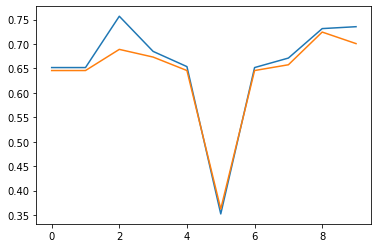

In [116]:

b.plot_acc()

In [149]:

b.get_best_weights()
            

[]


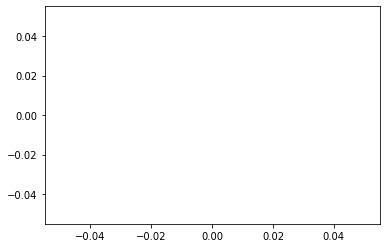

In [150]:
b.plot_error()

In [152]:
b.best_weight

{'weights': array([[-2.44235507, -9.813558  , -0.37642826, -0.05959777,  1.58017602,
         -4.03245283, -0.49513776, -2.09117123]]),
 'train_accuracy': 0.7315175097276264,
 'test_accuracy': 0.7244094488188977}